In [1]:
time = 'late'
if (time == 'late'):
    print(1)

1


In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading the data
data=pd.read_csv('data_cleaned.csv')

In [4]:
#shape of the data
data.shape

(891, 25)

In [5]:
#first five rows of the data
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [6]:
#checking missing values in the data
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
#seperating independent and dependent variables
y = data['Survived']
X = data.drop(['Survived'], axis=1)

In [8]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [9]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [10]:
# distribution in training set
y_train.value_counts(normalize=True)

Survived
0    0.616766
1    0.383234
Name: proportion, dtype: float64

In [11]:
# distribution in validation set
y_valid.value_counts(normalize=True)

Survived
0    0.61435
1    0.38565
Name: proportion, dtype: float64

In [12]:
#shape of training set
X_train.shape, y_train.shape

((668, 24), (668,))

In [13]:
#shape of validation set
X_valid.shape, y_valid.shape

((223, 24), (223,))

In [14]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [15]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [16]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [17]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [18]:
#checking the training score
dt_model.score(X_train, y_train)

0.9880239520958084

In [19]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.7533632286995515

In [20]:
#predictions on validation set
dt_model.predict(X_valid)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [21]:
dt_model.predict_proba(X_valid)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [22]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [23]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_valid, y_new)

0.7533632286995515

## Changing the max_depth

In [26]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [27]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300


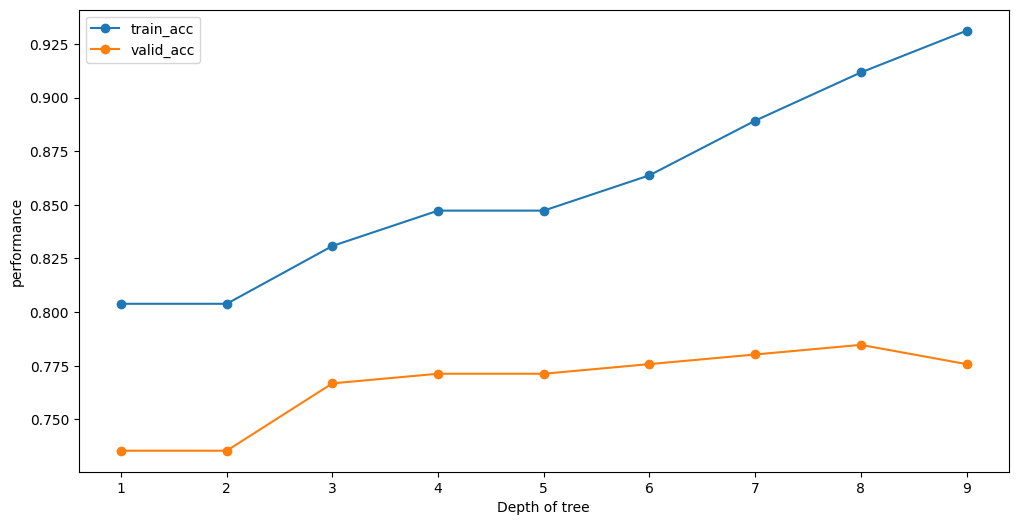

In [28]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(['train_acc','valid_acc'])

#### Similarly we can tweak other hyperparams as well
<ul>
    <li>max_depth
    <li>min_samples_split
    <li>min_samples_leaf
    <li>min_weight_fraction_leaf
    <li>max_leaf_nodes
    <li>min_impurity_decrease
    <li>min_impurity_split
</ul>

In [30]:
dt_model = DecisionTreeClassifier(
    max_depth=8, 
    max_leaf_nodes=25, 
    random_state=10
)
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [31]:
#Training score
dt_model.score(X_train, y_train)

0.8802395209580839

In [32]:
#Validation score
dt_model.score(X_valid, y_valid)

0.8116591928251121

In [33]:
from sklearn import tree
decision_tree = tree.export_graphviz(
    dt_model,
    out_file='tree.dot',
    feature_names=X_train.columns,
    max_depth=2,
    filled=True
)

In [34]:
!dot -Tpng tree.dot -o tree.png

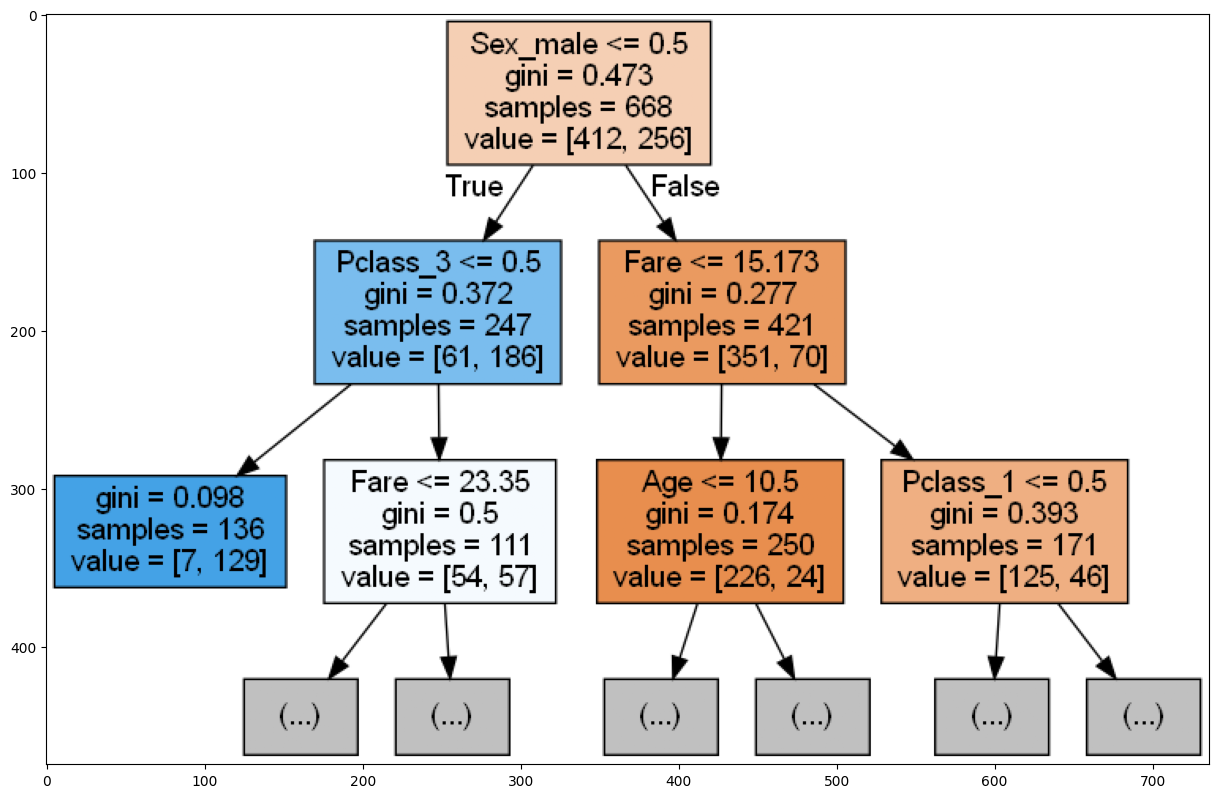

In [35]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

### Applications of Decision Tree:
<ol>
<li>Fraud detection
<li>Credit risk
<li>Loan default
<li>Predicting sales of a retail outlet (or any other business!)
<li>Number of bikes rented
<li>Employee attrition
<li>Customer churn
</ol>